In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols

from ISLP import load_data
from ISLP.models import (summarize, poly, ModelSpec as MS)
from statsmodels.stats.anova import anova_lm
from pygam import (s as s_gam, l as l_gam, f as f_gam, LinearGAM, LogisticGAM)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression



### Problem 6:

(a) Using polynomial regression, highest degree of 4 is preferrable by cross-validation MSE. ANOVA test also agree with this output.

In [2]:
Wage = load_data('Wage')
Wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [17]:
y = Wage['wage']
age = Wage['age']

age = sm.add_constant(age)
model_list = []

for high in range(2, 11):
    X = age.copy()
    for deg in range(2, high + 1):
        X[f'age_{deg}'] = X['age'] ** deg
    model = sm.OLS(y, X).fit()  
    model_list.append(model)
    
    scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Mean MSE of degree {high}: {-scores.mean()}")

anova_results = anova_lm(*model_list)
print()
print(anova_results)


Mean MSE of degree 2: 1599.5982268539046
Mean MSE of degree 3: 1594.7262162596826
Mean MSE of degree 4: 1593.91410392238
Mean MSE of degree 5: 1595.4331316554849
Mean MSE of degree 6: 1594.9304384006466
Mean MSE of degree 7: 1598.9305138392342
Mean MSE of degree 8: 1599.5018057439347
Mean MSE of degree 9: 1599.4216376646957
Mean MSE of degree 10: 1598.2531692685482

   df_resid           ssr  df_diff       ss_diff         F    Pr(>F)
0    2997.0  4.793430e+06      0.0           NaN       NaN       NaN
1    2996.0  4.777674e+06      1.0  15755.693664  9.864068  0.001702
2    2995.0  4.771604e+06      1.0   6070.152124  3.800302  0.051337
3    2994.0  4.770322e+06      1.0   1282.563017  0.802966  0.370280
4    2993.0  4.766389e+06      1.0   3932.257631  2.461844  0.116747
5    2993.0  4.764599e+06     -0.0   1790.494628      -inf       NaN
6    2993.0  4.764136e+06     -0.0    462.435544      -inf       NaN
7    2993.0  4.764981e+06     -0.0   -844.242937       inf       NaN
8    2993.

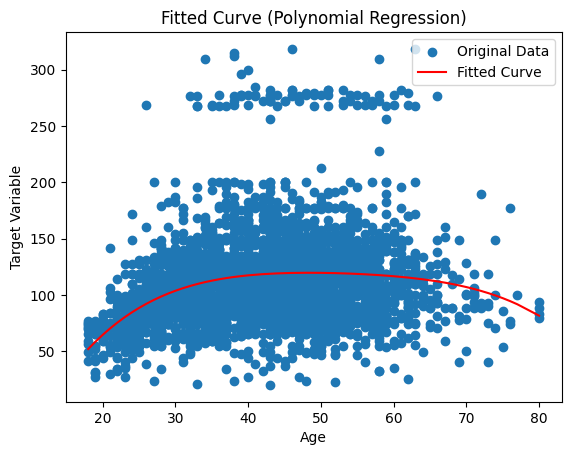

In [22]:
X = age.copy()
for deg in range(2, 4 + 1):
    X[f'age_{deg}'] = X['age'] ** deg
model = sm.OLS(y, X).fit()  

X_sorted = X.sort_values(by='age')  # Sort by age for a smooth curve
predictions = model.predict(X_sorted)

plt.scatter(age['age'], y, label='Original Data')
plt.plot(X_sorted['age'], predictions, color='red', label='Fitted Curve')

plt.xlabel('Age')
plt.ylabel('Target Variable')
plt.legend()
plt.title('Fitted Curve (Polynomial Regression)')
plt.show()

In [ ]:
for n in range(3, 16):
    cut_age = pd.qcut(age['age'], n)
    X = pd.get_dummies(cut_age)
    scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Mean MSE of degree {n}: {-scores.mean()}")


Mean MSE of degree 3: 1660.315910108878
Mean MSE of degree 4: 1640.8034880477321
Mean MSE of degree 5: 1637.7677036735163
Mean MSE of degree 6: 1630.3874966006497
Mean MSE of degree 7: 1624.1869530305435
Mean MSE of degree 8: 1619.0405140011505
Mean MSE of degree 9: 1619.311530409191
Mean MSE of degree 10: 1616.2771950973784
Mean MSE of degree 11: 1619.744234355415
Mean MSE of degree 12: 1617.1225374248122
Mean MSE of degree 13: 1612.9582086519863
Mean MSE of degree 14: 1607.4314577508935
Mean MSE of degree 15: 1613.2801420836176
Mean MSE of degree 16: 1610.415910421687
Mean MSE of degree 17: 1611.626449079739
Mean MSE of degree 18: 1614.3908226457675
Mean MSE of degree 19: 1616.9001370837516
